# Computer Vision

## Assignment 2

Vedansh Agrawal <br>
2021112010

### Question 1: Own Calibration

### 1.1

For the given image calib-object.jpg, we need to identify the chessboard internal corners.

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

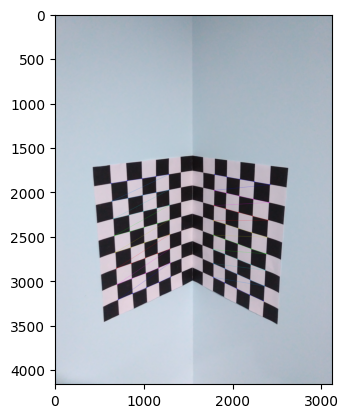

In [5]:
chess_board = cv2.imread('calib-object.jpg')
gray_chess_board = cv2.cvtColor(chess_board, cv2.COLOR_BGR2GRAY)
h, w, _ = chess_board.shape

left_chess = chess_board[:, :w//2]
right_chess = chess_board[:, w//2:]
right_gray = gray_chess_board[:,w//2:]
left_gray = gray_chess_board[:,:w//2]



board_size = (5, 8)

ret, corners1 = cv2.findChessboardCorners(left_gray, board_size, None)

if ret:
    img1 = cv2.drawChessboardCorners(left_chess, board_size, corners1, ret)
else:
    print('NO CORNERS FOUND')

ret, corners2 = cv2.findChessboardCorners(right_gray, board_size, None)

if ret:
    img2 = cv2.drawChessboardCorners(right_chess, board_size, corners2, ret)
else:
    print('NO CORNERS FOUND')

img = np.concatenate((img1, img2), axis = 1)

plt.imshow(img)

cv2.namedWindow('Chessboard Corners', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Chessboard Corners', 1000, 1000)
cv2.imshow('Chessboard Corners', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 1.2

Now, we need to take 12 points in the world coordinates and their corresponding image points. Below are the 12 points that will be chosen to do the calibration.

Image coordinates:
[[ 629.         1904.        ]
 [ 819.         2070.        ]
 [ 990.9753418  2218.08227539]
 [1011.5        2744.        ]
 [ 862.         2973.5       ]
 [ 708.5        3211.5       ]
 [2338.         3224.        ]
 [2190.5        2989.5       ]
 [2047.5        2756.        ]
 [2060.5        2230.5       ]
 [2226.         2081.        ]
 [2413.54803467 1917.3536377 ]]


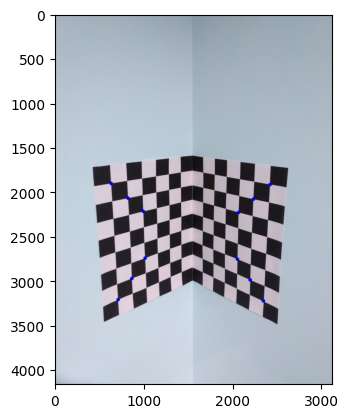

In [6]:
chess_board = cv2.imread('calib-object.jpg')

corners = np.zeros((12, 2))
corners[0] = corners1[0]
corners[1] = corners1[6]
corners[2] = corners1[12]
corners[3] = corners1[27]
corners[4] = corners1[31]
corners[5] = corners1[35]
corners[6] = corners2[0]
corners[7] = corners2[6]
corners[8] = corners2[12]
corners[9] = corners2[27]
corners[10] = corners2[31]
corners[11] = corners2[35]
corners[6:12, 0] += w/2


for x, y in corners:
    cv2.circle(chess_board, (int(x), int(y)), 20, (0, 0, 255), -1)

cv2.namedWindow('Corners Required for Calibrations', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Corners Required for Calibrations', 1000, 1000)
cv2.imshow('Corners Required for Calibrations', chess_board)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board)

print(f'Image coordinates:')
print(corners)

For the above image coordinates, we have the following world  assuming the world coordinates is at the bottom point of the board at the bend in the wall and the wall is bent at 90 degrees.

- (4.24, 4.24, 6)
- (2.82, 2.82, 6)
- (8.48, 8.48, 4)
- (7.07, 7.07, 4)
- (5.65, 5.65, 4)
- (4.24, 4.24, 4)
- (2.82, 2.82, 4)
- (8.48, 8.48, 2)
- (7.07, 7.07, 2)
- (5.65, 5.65, 2)
- (4.24, 4.24, 2)
- (2.82, 2.82, 2)

Now with these 12 sets of world and image coordinates, let us construct the matrix G (as taught in class).\

In [7]:
coordinates_list = [
    (8.48, 8.48, 16, 1),
    (7.07, 7.07, 14, 1),
    (5.65, 5.65, 12, 1),
    (5.65, 5.65, 6, 1),
    (7.07, 7.07, 4, 1),
    (8.48, 8.48, 2, 1),
    (-8.48, 8.48, 2, 1),
    (-7.07, 7.07, 4, 1),
    (-5.65, 5.65, 6, 1),
    (-5.65, 5.65, 12, 1),
    (-7.07, 7.07, 14, 1),
    (-8.48, 8.48, 16, 1)
]


world_coordinates = coordinates_list
G = np.zeros((24, 12))
for i in range(0, 24, 2):
    G[i, :4] = coordinates_list[i//2]
    G[i+1, 4:8] = coordinates_list[i//2]
    G[i, -4:] = np.array(coordinates_list[i//2])*-corners[i//2, 0]
    G[i+1, -4:] = np.array(coordinates_list[i//2])*-corners[i//2, 1]

print(G)


[[ 8.48000000e+00  8.48000000e+00  1.60000000e+01  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.33392000e+03 -5.33392000e+03 -1.00640000e+04 -6.29000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.48000000e+00  8.48000000e+00  1.60000000e+01  1.00000000e+00
  -1.61459200e+04 -1.61459200e+04 -3.04640000e+04 -1.90400000e+03]
 [ 7.07000000e+00  7.07000000e+00  1.40000000e+01  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.79033000e+03 -5.79033000e+03 -1.14660000e+04 -8.19000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.07000000e+00  7.07000000e+00  1.40000000e+01  1.00000000e+00
  -1.46349000e+04 -1.46349000e+04 -2.89800000e+04 -2.07000000e+03]
 [ 5.65000000e+00  5.65000000e+00  1.20000000e+01  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.59901068e+03 -5.59901068e+03 -1.18917041e+04 -9.90975342e+02]
 [ 0.

Now that we have our G matrix, we can find the P matrix which is the eigen vector of the covariance of G

In [8]:
covariance = np.dot(G.T, G)
eig_values, eig_vectors = np.linalg.eig(covariance)
indexs = np.argmin(eig_values)
eig_vectors = eig_vectors[:, indexs]
P = np.reshape(eig_vectors, (3, 4))
print("The P matrix is :")
print(P)

The P matrix is :
[[-2.31471688e-02 -9.97992065e-03 -2.29797929e-03  4.56779570e-01]
 [-1.47222107e-04 -7.22093741e-03 -2.53720849e-02  8.88828307e-01]
 [ 2.58367158e-08 -6.22104355e-06 -1.46618882e-06  2.96984272e-04]]


Now that we have P, let us take the M matrix and use QR factorisation to obtain K and R, and then use that to obtain t as well.

In [9]:
M = P[:, :3]
p4 = np.reshape(P[:, -1], (-1, 1))

X = np.dot(M, M.T)
K = np.zeros((3, 3))

K[2, 2] = 1
K[0, 2] = X[0, 2]
K[1, 2] = X[1, 2]
K[1, 1] = np.sqrt(X[1, 1] - K[1, 2]**2)
K[0, 1] = 0
K[0, 0] = np.sqrt(X[0, 0] - K[0, 2]**2 - K[0, 1]**2)

R = np.linalg.solve(K, M)
t = np.linalg.solve(K, p4)

print("Intrinsic K:")
print(K,'\n')

print("Extrinsic R:")
print(R,'\n')

print("Extrinsic t:")
print(t,'\n')

Intrinsic K:
[[2.53114786e-02 0.00000000e+00 6.48567457e-08]
 [0.00000000e+00 2.63800361e-02 8.21182295e-08]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Extrinsic R:
[[-9.14492953e-01 -3.94284380e-01 -9.07880303e-02]
 [-5.58081521e-03 -2.73727352e-01 -9.61791137e-01]
 [ 2.58367158e-08 -6.22104355e-06 -1.46618882e-06]] 

Extrinsic t:
[[1.80463408e+01]
 [3.36932180e+01]
 [2.96984272e-04]] 



Above is all the obtained Extrinsic and Intrinsic values

### 1.3

With the help of the above obtained camera parameters, we need to find the outer corners of the chessboard in the image plane and draw a wireframe around the image. The world coordinates of the 6 corners will be

- (0, 0, 0)
- (0, 0, 16)
- (9.89, 9.89, 0)
- (9.89, 9.89, 16)
- (-9.89, 9.89, 0)
- (-9.89, 9.89, 16)

In [10]:
World_coordinates = np.ones((6, 4, 1))
World_coordinates[0] = [[0], [0], [0], [1]]
World_coordinates[3] = [[0], [0], [18], [1]]
World_coordinates[1] = [[9.89], [9.89], [0], [1]]
World_coordinates[2] = [[9.89], [9.89], [18], [1]]
World_coordinates[5] = [[-9.89], [9.89], [0], [1]]
World_coordinates[4] = [[-9.89], [9.89], [18], [1]]


image_coordinates = np.zeros((6, 2))
for i in range(6):
    image_coordinates_homogenous = np.dot(P, World_coordinates[i])
    image_coordinates[i, 0] = image_coordinates_homogenous[0]/image_coordinates_homogenous[2]
    image_coordinates[i, 1] = image_coordinates_homogenous[1]/image_coordinates_homogenous[2]

print(image_coordinates)


[[1538.05979922 2992.84638659]
 [ 547.92177095 3461.64558599]
 [ 419.39648664 1716.29930856]
 [1535.20651703 1596.9776768 ]
 [2613.07800992 1734.44569118]
 [2495.73596833 3481.54811911]]


Now let us join all the above points do make the wireframe

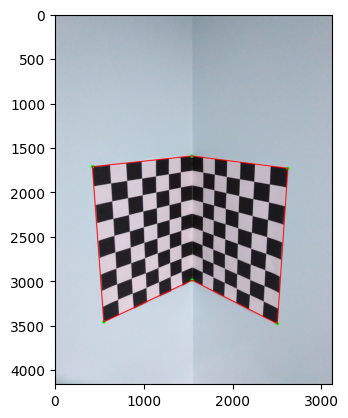

In [11]:
chess_board = cv2.imread('calib-object.jpg')

for x, y in image_coordinates:
    cv2.circle(chess_board, (int(x), int(y)), 20, (0, 255, 0), -1)
    
for i in range(0, len(image_coordinates)-1, 1):
    x1 = int(image_coordinates[i, 0])
    y1 = int(image_coordinates[i, 1])
    x2 = int(image_coordinates[i+1, 0])
    y2 = int(image_coordinates[i+1, 1])
    cv2.line(chess_board, (x1, y1), (x2, y2), (255, 0, 0), 10)

cv2.line(chess_board, (int(image_coordinates[5, 0]), int(image_coordinates[5, 1])), (int(image_coordinates[0, 0]), int(image_coordinates[0, 1])), (255, 0, 0), 10)

cv2.namedWindow('Wireframe', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Wireframe', 1000, 1000)
cv2.imshow('Wireframe', chess_board)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board)

As we can observe, the wireframe properly outlines the chessboard.

### 1.4

From the Rotation matrix obtained during calibration, let us find the angles the camera rotated.

Let us assume, that we rotate along the x-axis, and then the y-axis and then the z-axis, we can use Euler angle decomposition to obtain the angles along these 3 axes in the above particular order(Roll-Pitch-Yaw).

In [12]:
pitch = np.degrees(np.arcsin(R[2, 0]))  
roll = np.degrees(np.arctan2(-R[2, 1], R[2, 2])) 
yaw = np.degrees(np.arctan2(-R[1, 0], R[0, 0]))

print("Following are the rotations made in this particular order(Roll-Pitch-Yaw):")
print(f"Roll/Tilt(About x-axis): {roll}")
print(f"Pitch/Pan(About y-axis): {pitch}")
print(f"Yaw/Roll(About z-axis): {yaw}")

Following are the rotations made in this particular order(Roll-Pitch-Yaw):
Roll/Tilt(About x-axis): 103.26158352046517
Pitch/Pan(About y-axis): 1.4803347696294404e-06
Yaw/Roll(About z-axis): 179.6503492045518


## Question 2

### 2.1

In this question, we will repeat the above calibration process but using openCVs inbulit function instead of using numpy.

In [14]:
chess_board = cv2.imread('calib-object.jpg')
gray_chess_board = cv2.cvtColor(chess_board, cv2.COLOR_BGR2GRAY)

obj_coordinates = np.array(world_coordinates)[:, :-1]
obj_coordinates = np.array(obj_coordinates, dtype=np.float32)
corners = np.array(corners, dtype=np.float32)

flag = cv2.CALIB_ZERO_TANGENT_DIST | cv2.CALIB_FIX_K1 | cv2.CALIB_FIX_K2 | cv2.CALIB_FIX_K3 | cv2.CALIB_FIX_K4 | cv2.CALIB_FIX_K5 | cv2.CALIB_FIX_K6 | cv2.CALIB_USE_INTRINSIC_GUESS;

mtx_init = np.array([[1000, 0, 640], [0, 1000, 480], [0, 0, 1]], dtype=np.float32)
dist_init = np.array([0.0, 0.0, 0.0, 0.0, 0.0], dtype=np.float32)

ret, camera_mat, distortion, rotation_vecs, translation_vecs = cv2.calibrateCamera([obj_coordinates], [corners], gray_chess_board.shape[::-1], mtx_init, dist_init, flags = flag)

print("Following is K")
print(camera_mat,'\n')

R = cv2.Rodrigues(rotation_vecs[0])
print("Following is R")
print(R[0],'\n')

print("Following is t")
print(translation_vecs[0])

Following is K
[[3.64092976e+03 0.00000000e+00 1.59368659e+03]
 [0.00000000e+00 3.61846202e+03 2.01204537e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Following is R
[[-0.99989525 -0.01409194  0.00330109]
 [-0.00647433  0.23150212 -0.97281285]
 [ 0.01294461 -0.97273233 -0.23156911]] 

Following is t
[[-0.65955131]
 [12.62538697]
 [46.60181482]]


Now let us make the wireframe and overlay it on the image.

In [15]:
P = np.dot(camera_mat, np.concatenate((R[0], translation_vecs[0]), axis = 1))
print("The P matix is:")
print(P)

The P matix is:
[[-3.61991874e+03 -1.60153823e+03 -3.57029563e+02  7.18673075e+04]
 [ 2.61802552e+00 -1.11949995e+03 -3.98601392e+03  1.39449449e+05]
 [ 1.29446109e-02 -9.72732329e-01 -2.31569109e-01  4.66018148e+01]]


In [16]:


image_coordinates = np.zeros((6, 2))
for i in range(6):
    image_coordinates_homogenous = np.dot(P, World_coordinates[i])
    image_coordinates[i, 0] = image_coordinates_homogenous[0]/image_coordinates_homogenous[2]
    image_coordinates[i, 1] = image_coordinates_homogenous[1]/image_coordinates_homogenous[2]

print(image_coordinates)

[[1542.15684021 2992.36091296]
 [ 545.06501834 3460.12308156]
 [ 418.94455837 1719.88620366]
 [1542.19345748 1595.46314892]
 [2612.87955498 1731.7748378 ]
 [2491.73526907 3482.75760171]]


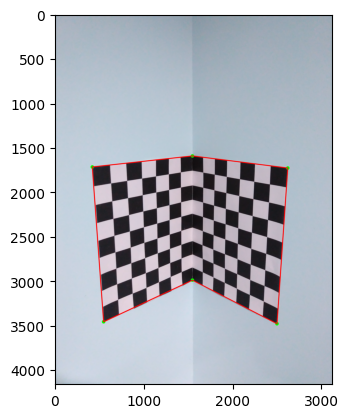

In [17]:
chess_board = cv2.imread('calib-object.jpg')

for x, y in image_coordinates:
    cv2.circle(chess_board, (int(x), int(y)), 20, (0, 255, 0), -1)
    
for i in range(0, len(image_coordinates)-1, 1):
    x1 = int(image_coordinates[i, 0])
    y1 = int(image_coordinates[i, 1])
    x2 = int(image_coordinates[i+1, 0])
    y2 = int(image_coordinates[i+1, 1])
    cv2.line(chess_board, (x1, y1), (x2, y2), (255, 0, 0), 10)

cv2.line(chess_board, (int(image_coordinates[5, 0]), int(image_coordinates[5, 1])), (int(image_coordinates[0, 0]), int(image_coordinates[0, 1])), (255, 0, 0), 10)

cv2.namedWindow('Wireframe', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Wireframe', 1000, 1000)
cv2.imshow('Wireframe', chess_board)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board)

As we can compare with the results in question 1. The intrinsic and extrinsic matrices are completely dfferent, however the wireframe made comes to outline the chessboard perfectly. Even when comparing the final image cooredinates of every corner on the image, we can see that there is small differences in the numbers.

### 2.2

For this part, we need to calibrate another given image as below

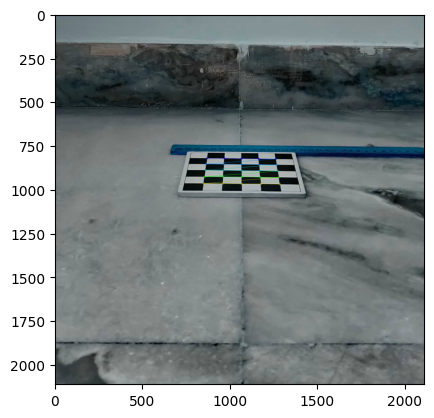

In [18]:
chess_board_2 = cv2.imread('assign1.jpg')
gray_chess_board_2 = cv2.cvtColor(chess_board_2, cv2.COLOR_BGR2GRAY)

board_size = (5, 5)

ret, corners_2 = cv2.findChessboardCorners(gray_chess_board_2, board_size, None)

if ret:
    img = cv2.drawChessboardCorners(chess_board_2, board_size, corners_2, ret)
    cv2.namedWindow('Chessboard Corners', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Chessboard Corners', 1000, 1000)
    cv2.imshow('Chessboard Corners', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    plt.imshow(img)

Now assuming the tiles are 2cm long like for the previous chessboard, we can find its world coordinates, assuking the world origin is the top left corner of the chessboard.

In [19]:
board_coordinates = np.zeros((25, 3))
for i in range(1,6):
    for j in range(1,6):
        board_coordinates[5*(i-1) + j - 1, 0] = i*2
        board_coordinates[5*(i-1) + j - 1, 1] = j*2

corners_2 = np.array(corners_2, dtype=np.float32)
board_coordinates = np.array(board_coordinates, dtype=np.float32)

ret, camera_mat, distortion, rotation_vecs, translation_vecs = cv2.calibrateCamera([board_coordinates], [corners_2], gray_chess_board_2.shape[::-1], None, None)
print("Following is K")
print(camera_mat,'\n')

R = cv2.Rodrigues(rotation_vecs[0])
print("Following is R")
print(R[0],'\n')

print("Following is t")
print(translation_vecs[0])


Following is K
[[1.60508571e+03 0.00000000e+00 1.04077164e+03]
 [0.00000000e+00 6.69425959e+02 1.06279182e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Following is R
[[ 2.79006003e-04  9.99162191e-01  4.09247795e-02]
 [ 9.25106533e-01  1.52815550e-02 -3.79400023e-01]
 [-3.79707552e-01  3.79656357e-02 -9.24327207e-01]] 

Following is t
[[ -5.53815209]
 [-13.44052733]
 [ 32.83924973]]


Now we shall compute matrix P

In [20]:
P = np.dot(camera_mat, np.concatenate((R[0], translation_vecs[0]), axis = 1))
print("This is matrix P")
print(P)

This is matrix P
[[-3.94741022e+02  1.64325451e+03 -8.96325760e+02  2.52889509e+04]
 [ 2.15740245e+02  5.05794369e+01 -1.23634762e+03  2.59038482e+04]
 [-3.79707552e-01  3.79656357e-02 -9.24327207e-01  3.28392497e+01]]


In [21]:
Board_corners = np.zeros((4, 4, 1))
Board_corners[0] = [[0], [0], [0], [1]]
Board_corners[1] = [[12], [0], [0], [1]]
Board_corners[2] = [[12], [12], [0], [1]]
Board_corners[3] = [[0], [12], [0], [1]]

image_coordinates = np.zeros((4, 2))
for i in range(4):
    image_coordinates_homogenous = np.dot(P, Board_corners[i])
    image_coordinates[i, 0] = image_coordinates_homogenous[0]/image_coordinates_homogenous[2]
    image_coordinates[i, 1] = image_coordinates_homogenous[1]/image_coordinates_homogenous[2]

print(image_coordinates)

[[ 770.08308925  788.80755348]
 [ 726.66385009 1007.42403095]
 [1401.30234743 1012.57336395]
 [1351.80131713  796.24360961]]


Now creating the mesh

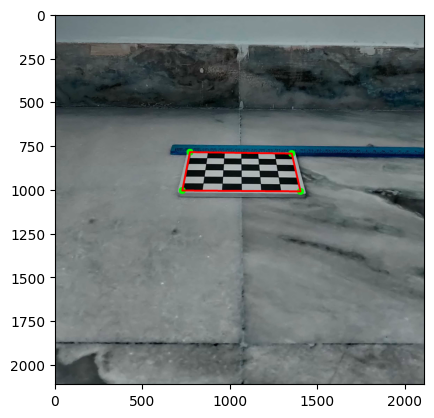

In [22]:
chess_board_2 = cv2.imread('assign1.jpg')

for x, y in image_coordinates:
    cv2.circle(chess_board_2, (int(x), int(y)), 20, (0, 255, 0), -1)
    
for i in range(0, len(image_coordinates)-1, 1):
    x1 = int(image_coordinates[i, 0])
    y1 = int(image_coordinates[i, 1])
    x2 = int(image_coordinates[i+1, 0])
    y2 = int(image_coordinates[i+1, 1])
    cv2.line(chess_board_2, (x1, y1), (x2, y2), (255, 0, 0), 10)

cv2.line(chess_board_2, (int(image_coordinates[3, 0]), int(image_coordinates[3, 1])), (int(image_coordinates[0, 0]), int(image_coordinates[0, 1])), (255, 0, 0), 10)

cv2.namedWindow('Wireframe', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Wireframe', 1000, 1000)
cv2.imshow('Wireframe', chess_board_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board_2)

As we can obsrerve there is no distortion in the wireframe above and it overlays the boundary of the chessboard really well.

Co-planar points result in an underconstrained system of equations during calibration. This means that there are multiple solutions that satisfy the calibration constraints, making it challenging to determine the correct projection matrix uniquely.

### 2.3

In this part we need to find the image point of the world origin which is placed at the top left corner of our image. Let us see if we obtain this point using the calibration matrix

In [23]:
world_origin = [[0], [0], [0], [1]]
image_coordinates_homogenous = np.dot(P, world_origin)

image_coordinates_world = np.zeros((2,))
image_coordinates_world[0] = image_coordinates_homogenous[0]/image_coordinates_homogenous[2]
image_coordinates_world[1] = image_coordinates_homogenous[1]/image_coordinates_homogenous[2]

print(image_coordinates_world)

[770.08308925 788.80755348]


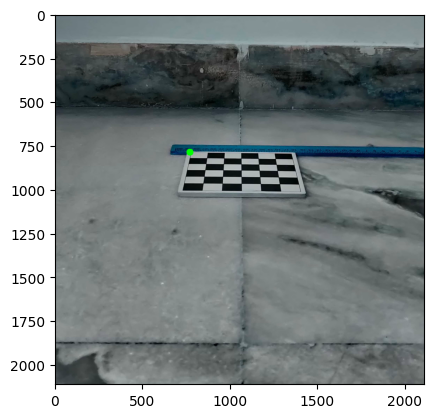

In [24]:
chess_board_2 = cv2.imread("assign1.jpg")
cv2.circle(chess_board_2, (int(image_coordinates_world[0]), int(image_coordinates_world[1])), 20, (0, 255, 0), -1)

cv2.namedWindow('Wireframe', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Wireframe', 1000, 1000)
cv2.imshow('Wireframe', chess_board_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board_2)

As we can see, this observation agrees with our expectstions, since the point projected in the image is where the world coordinate should also exist.

## Question 3

### 3.1

Now, let us assum, the chessboard int he above image has shofted to the right by 10 cm, that means along the x axis, let us now draw the new wireframe that should be made.

In [25]:
Board_corners[0, 1] = 10
Board_corners[1, 1] = 10
Board_corners[2, 1] = 22
Board_corners[3, 1] = 22

image_coordinates_new = np.zeros((4, 2))
for i in range(4):
    image_coordinates_homogenous = np.dot(P, Board_corners[i])
    image_coordinates_new[i, 0] = image_coordinates_homogenous[0]/image_coordinates_homogenous[2]
    image_coordinates_new[i, 1] = image_coordinates_homogenous[1]/image_coordinates_homogenous[2]

print(image_coordinates_new)

[[1255.95634807  795.01843128]
 [1290.35195127 1011.72650961]
 [1947.37453867 1016.74138514]
 [1824.54265263  802.28662312]]


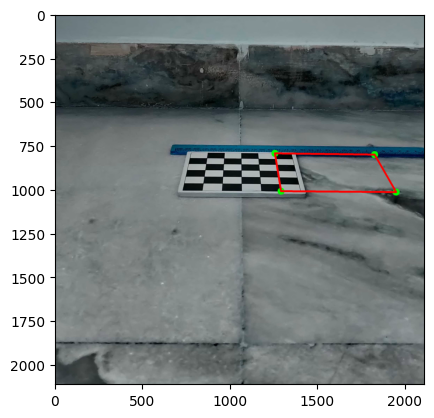

In [26]:
chess_board_2 = cv2.imread('assign1.jpg')

for x, y in image_coordinates_new:
    cv2.circle(chess_board_2, (int(x), int(y)), 20, (0, 255, 0), -1)
    
for i in range(0, len(image_coordinates_new)-1, 1):
    x1 = int(image_coordinates_new[i, 0])
    y1 = int(image_coordinates_new[i, 1])
    x2 = int(image_coordinates_new[i+1, 0])
    y2 = int(image_coordinates_new[i+1, 1])
    cv2.line(chess_board_2, (x1, y1), (x2, y2), (255, 0, 0), 10)

cv2.line(chess_board_2, (int(image_coordinates_new[3, 0]), int(image_coordinates_new[3, 1])), (int(image_coordinates_new[0, 0]), int(image_coordinates_new[0, 1])), (255, 0, 0), 10)

cv2.namedWindow('Wireframe', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Wireframe', 1000, 1000)
cv2.imshow('Wireframe', chess_board_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board_2)

Here also, as we can see from the knew wireframe, it does appear to be the outline of the chessboard if it had been shifted 10cm to the right. Also considering that the width of the board is 12cm, we expect the shifted chessboard to have one of its columns overlap with the original position of the chessboard.

### 3.2

Now we will try to shift the chessboard in the image to the actual shifted wireframe given above which is 10 cm shofted to the right.

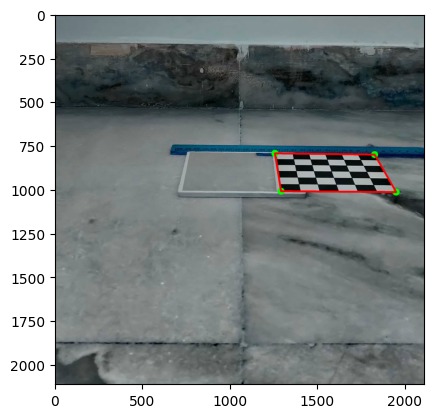

In [27]:
chess_board_2 = cv2.imread("assign1.jpg")

image_coordinates = np.array(image_coordinates, dtype=np.float32)
image_coordinates_new = np.array(image_coordinates_new, dtype=np.float32)

perspective_matrix = cv2.getPerspectiveTransform(image_coordinates, image_coordinates_new)
mask = np.zeros_like(chess_board_2)
coordinates = np.array([image_coordinates[0], image_coordinates[1], image_coordinates_new[2], image_coordinates_new[3]])

cv2.fillPoly(mask, [coordinates.astype(int)], (255, 255, 255))

result_image = cv2.warpPerspective(chess_board_2, perspective_matrix, (chess_board_2.shape[1], chess_board_2.shape[0]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

result_image_1 = cv2.bitwise_and(result_image, mask)
original_image = cv2.bitwise_and(chess_board_2, cv2.bitwise_not(mask))
result_image = cv2.add(original_image, result_image_1)


for x, y in image_coordinates_new:
    cv2.circle(result_image, (int(x), int(y)), 20, (0, 255, 0), -1)
    
for i in range(0, len(image_coordinates_new)-1, 1):
    x1 = int(image_coordinates_new[i, 0])
    y1 = int(image_coordinates_new[i, 1])
    x2 = int(image_coordinates_new[i+1, 0])
    y2 = int(image_coordinates_new[i+1, 1])
    cv2.line(result_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

cv2.line(result_image, (int(image_coordinates_new[3, 0]), int(image_coordinates_new[3, 1])), (int(image_coordinates_new[0, 0]), int(image_coordinates_new[0, 1])), (255, 0, 0), 10)

cv2.namedWindow('Shifted', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Shifted', 1000, 1000)
cv2.imshow('Shifted', result_image)

cv2.namedWindow('Original', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Original', 1000, 1000)
cv2.imshow('Original', chess_board_2)

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(result_image)


Here, we can very clearly see that the pattern of the chessboard has been shifted 10cm and the corners perfectly align with the wireframe which was generated in the previous part of this question.